# Start

In [ ]:
!pip install scikit-learn==1.0.2
#!python -m pip install pytorch-lightning==1.5.10
!python -m pip install pytorch-lightning==1.5.10

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 45.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.7/527.7 kB 30.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 58.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 952.4/952.4 kB 69.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 59.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 29.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 23

In [ ]:
import numpy as np
import scipy
import pandas as pd
import math
import random
import sklearn
from nltk.corpus import stopwords
from scipy.sparse import csr_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import pytorch_lightning as pl

np.random.seed(123)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
articles_df = pd.read_csv('/content/drive/MyDrive/workshop/IT/shared_articles.csv')
articles_df = articles_df[articles_df['eventType'] == 'CONTENT SHARED']
articles_df = articles_df.astype({'contentId': 'int64'})
articles_df.sort_values(by=['contentId'])
articles_df.head(1000)

,timestamp,eventType,contentId,authorPersonId,authorSessionId,authorUserAgent,authorRegion,authorCountry,contentType,url,title,text,lang
1,1459193988,CONTENT SHARED,-4110354420726924800,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.nytimes.com/2016/03/28/business/dea...,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,en
2,1459194146,CONTENT SHARED,-7292285110016210944,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://cointelegraph.com/news/bitcoin-future-w...,Bitcoin Future: When GBPcoin of Branson Wins O...,The alarm clock wakes me at 8:00 with stream o...,en
3,1459194474,CONTENT SHARED,-6151852268067519488,3891637997717104548,-1457532940883382585,NaN,NaN,NaN,HTML,https://cloudplatform.googleblog.com/2016/03/G...,Google Data Center 360° Tour,We're excited to share the Google Data Center ...,en
4,1459194497,CONTENT SHARED,2448026894306402304,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,https://bitcoinmagazine.com/articles/ibm-wants...,"IBM Wants to ""Evolve the Internet"" With Blockc...",The Aite Group projects the blockchain market ...,en
5,1459194522,CONTENT SHARED,-2826566343807132160,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.coindesk.com/ieee-blockchain-oxford...,IEEE to Talk Blockchain at Cloud Computing Oxf...,One of the largest and oldest organizations fo...,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1035,1463695207,CONTENT SHARED,6045455576279705600,-1443636648652872475,8859116645558208595,NaN,NaN,NaN,HTML,http://www.engadget.com/2016/05/18/google-not-...,Google isn't abandoning Hangouts for its new c...,"Allo, on the other hand, is a mobile app more ...",en
1036,1463696081,CONTENT SHARED,8076265166566225920,-1130272294246983140,788079039024593379,NaN,NaN,NaN,HTML,http://www.zeldman.com/2015/12/24/the-year-in-...,The Year in Design - Zeldman on Web & Interact...,Mobile is today's first screen. So design resp...,en
1037,1463707577,CONTENT SHARED,379773866860040384,-7456488753754080246,8916924129101545638,NaN,NaN,NaN,HTML,http://gs.statcounter.com/press/firefox-browse...,Firefox edges out Microsoft globally for first...,Firefox edges out Microsoft globally for first...,en
1038,1463749016,CONTENT SHARED,8835339470389645312,-1387464358334758758,4255314756189922878,NaN,NaN,NaN,HTML,http://googlediscovery.com/2016/05/19/aplicati...,Aplicativos do Android agora podem reagir com ...,O Google anunciou durante a conferência para d...,pt


In [ ]:
interactions_df = pd.read_csv('/content/drive/MyDrive/workshop/IT/users_interactions.csv')
interactions_df = interactions_df.astype({'contentId': 'int64'})
interactions_df = interactions_df.astype({'sessionId': 'int64'})
interactions_df = interactions_df.head(1000)

# Data munging

เราจะกำหนดน้ำหนักความสนใจที่ต่างกัน โดยสนใจ comment created ที่ 4.0 ซึ่งมีน้ำหนักมากสุด

In [ ]:
event_type_strength = {
   'VIEW': 1.0,
   'LIKE': 2.0,
   'BOOKMARK': 2.5,
   'FOLLOW': 3.0,
   'COMMENT CREATED': 4.0,
}

interactions_df['eventStrength'] = interactions_df['eventType'].apply(lambda x: event_type_strength[x])

- โดยระบบ recommend จะมีปัญหาที่จะพบเจอได้บ่อยคือ user cold-start หรือนั่นก็คือ user ไม่เคยใช้งานระบบมาก่อน จึงทำให้ไม่รู้จะแนะนำอะไร โดยในการทำครั้งนี้จะมีการใช้ข้อมูลที่มีการติดต่อกับระบบอย่างน้อย 5 ครั้ง
- โดยจาก code เราจะ group interaction (personId กับ contentId) โดย group จาก personId เดียวกันและ
    - print จำนวน user ทั้งหมดออกมา
    - จากนั้นจึง print user ที่มีการ interaction อย่างน้อย 5 ครั้ง


In [ ]:
users_interactions_count_df = interactions_df.groupby(['personId', 'contentId']).size().groupby('personId').size()
print('# users: %d' % len(users_interactions_count_df))
users_with_enough_interactions_df = users_interactions_count_df[users_interactions_count_df >= 5].reset_index()[['personId']]
print('# users with at least 5 interactions: %d' % len(users_with_enough_interactions_df))

# users: 270
# users with at least 5 interactions: 24


ต่อไปเราจะ print จำนวนของการโต้ตอบ (interaction)ทั้งหมดออกมา
และตามด้วยจำนวนของการโต้ตอบจากผู้ใช้ที่มีการโต้ตอบอย่างน้อย 5 ครั้ง
- เราจะเลือกเอาเฉพาะที่มีโต้ตอบ 5 ครั้ง โดยอยู่ในตัวแปร interactions_from_selected_users_df

In [ ]:
users_with_enough_interactions_df

,personId
0,-9016528795238256703
1,-8845298781299428018
2,-8550167523008133722
3,-8020832670974472349
4,-3596626804281480007
5,-3390049372067052505
6,-2626634673110551643
7,-1602833675167376798
8,-1443636648652872475
9,-1032019229384696495


In [ ]:
print('# of interactions: %d' % len(interactions_df))
interactions_from_selected_users_df = interactions_df.merge(users_with_enough_interactions_df,
               how = 'right',
               left_on = 'personId',
               right_on = 'personId')
print('# of interactions from users with at least 5 interactions: %d' % len(interactions_from_selected_users_df))

# of interactions: 1000
# of interactions from users with at least 5 interactions: 405


ในการสร้างระบบ Recomendation เราจะรวมการโต้ตอบทั้งหมดของผู้ใช้เข้าด้วยกันในแต่ละเรื่องแล้วเอาผลรวมมา weight น้ำหนักตามน้ำหนักความสนใจที่เราได้กำหนดไว้ข้างต้น (eventStrength) เช่น เรื่องนี้คนนี้มีการโต้ตอบทั้งอ่านทั้งกดไลค์

In [ ]:
def smooth_user_preference(x):
    return math.log(1+x, 2)

interactions_full_df = interactions_from_selected_users_df \
                    .groupby(['personId', 'contentId'])['eventStrength'].sum() \
                    .apply(smooth_user_preference).reset_index()
print('# of unique user/item interactions: %d' % len(interactions_full_df))
interactions_full_df.head(10)

# of unique user/item interactions: 249


,personId,contentId,eventStrength
0,-9016528795238256703,-9019233957195912192,1.584963
1,-9016528795238256703,-4386371945374980096,1.584963
2,-9016528795238256703,-4228415104574263808,1.584963
3,-9016528795238256703,-1753606726398515968,1.000000
4,-9016528795238256703,-1453783314552286720,1.000000
5,-9016528795238256703,-582471538642477952,1.000000
6,-9016528795238256703,7933362470375279616,1.000000
7,-8845298781299428018,-6142462826726347776,1.000000
8,-8845298781299428018,-4760639635023249408,1.000000
9,-8845298781299428018,-3499919498720038912,1.584963


# Evaluation

- การประเมินหรือ evaluation มีความสำคัญอย่างมากในการทำ machine learning projects เพื่อเปรียบเทียบประสิทธิภาพและเลือก alg หรือ พารามิเตอร์ที่ดีที่สุด

- โดยในครั้งนี้เราจะใช้ cross-validation เทคนิค ที่มีชื่อว่า holdout โดยจะมี random data sample 20%  ที่แยกออกจากการ train เพื่อนำมา test โดยเฉพาะ

random_state คือ ค่า seed ที่กำหนดการ random กลุ่มข้อมูล จะเป็นเลขจำนวนเต็ม ถ้ากำหนดเลขเดิม ผลการ split ก็เหมือนเดิม

In [ ]:
interactions_train_df, interactions_test_df = train_test_split(interactions_full_df,
                                   stratify=interactions_full_df['personId'],
                                   test_size=0.20,
                                   random_state=42)

print('# interactions on Train set: %d' % len(interactions_train_df))
print('# interactions on Test set: %d' % len(interactions_test_df))

# interactions on Train set: 199
# interactions on Test set: 50


In [ ]:
#Indexing by personId to speed up the searches during evaluation
interactions_full_indexed_df = interactions_full_df.set_index('personId')
interactions_train_indexed_df = interactions_train_df.set_index('personId')
interactions_test_indexed_df = interactions_test_df.set_index('personId')

In [ ]:
interactions_df #คือข้อมูลใหญ่สุด

,timestamp,eventType,contentId,personId,sessionId,userAgent,userRegion,userCountry,eventStrength
0,1465413032,VIEW,-3499919498720038912,-8845298781299428018,1264196770339959040,NaN,NaN,NaN,1.0
1,1465412560,VIEW,8890720798209849344,-1032019229384696495,3621737643587579392,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2...,NY,US,1.0
2,1465416190,VIEW,310515487419366976,-1130272294246983140,2631864456530402304,NaN,NaN,NaN,1.0
3,1465413895,FOLLOW,310515487419366976,344280948527967603,-3167637573980063744,NaN,NaN,NaN,3.0
4,1465412290,VIEW,-7820640624231356416,-445337111692715325,5611481178424124416,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...
995,1461220789,LIKE,-2871288807409592,8968131284214320024,270937141190092288,NaN,NaN,NaN,2.0
996,1461220715,VIEW,-2871288807409592,8968131284214320024,270937141190092288,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_5...,?,SG,1.0
997,1461220852,VIEW,-2871288807409592,8968131284214320024,270937141190092288,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_5...,?,SG,1.0
998,1462808208,VIEW,-1492574794514500096,8913362709216003291,2882730553351882240,Mozilla/5.0 (X11; Fedora; Linux x86_64) AppleW...,SP,BR,1.0


In [ ]:
def get_items_interacted(person_id, interactions_df):
    # Get the user's data and merge in the movie information.
    interacted_items = interactions_df.loc[person_id]['contentId']
    return set(interacted_items if type(interacted_items) == pd.Series else [interacted_items]) #บรรทัดนี้อยากได้ set

In [ ]:
interactions_df

,timestamp,eventType,contentId,personId,sessionId,userAgent,userRegion,userCountry,eventStrength
0,1465413032,VIEW,-3499919498720038912,-8845298781299428018,1264196770339959040,NaN,NaN,NaN,1.0
1,1465412560,VIEW,8890720798209849344,-1032019229384696495,3621737643587579392,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2...,NY,US,1.0
2,1465416190,VIEW,310515487419366976,-1130272294246983140,2631864456530402304,NaN,NaN,NaN,1.0
3,1465413895,FOLLOW,310515487419366976,344280948527967603,-3167637573980063744,NaN,NaN,NaN,3.0
4,1465412290,VIEW,-7820640624231356416,-445337111692715325,5611481178424124416,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...
995,1461220789,LIKE,-2871288807409592,8968131284214320024,270937141190092288,NaN,NaN,NaN,2.0
996,1461220715,VIEW,-2871288807409592,8968131284214320024,270937141190092288,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_5...,?,SG,1.0
997,1461220852,VIEW,-2871288807409592,8968131284214320024,270937141190092288,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_5...,?,SG,1.0
998,1462808208,VIEW,-1492574794514500096,8913362709216003291,2882730553351882240,Mozilla/5.0 (X11; Fedora; Linux x86_64) AppleW...,SP,BR,1.0


In [ ]:
interactions_df.loc[1]['contentId']

8890720798209849344

หน้าตาของ interactions_full_indexed_df

In [ ]:
interactions_full_indexed_df

,contentId,eventStrength
personId,,
-9016528795238256703,-9019233957195912192,1.584963
-9016528795238256703,-4386371945374980096,1.584963
-9016528795238256703,-4228415104574263808,1.584963
-9016528795238256703,-1753606726398515968,1.000000
-9016528795238256703,-1453783314552286720,1.000000
...,...,...
8239286975497580612,-348408475077850752,1.000000
8239286975497580612,372531153711028224,1.000000
8239286975497580612,1441248639512899328,1.584963


In [ ]:
เทส = set(articles_df['contentId'])
เลนเทส = len(เทส)
เทส
print (เลนเทส)

1000


In [ ]:
ซีด = set()
for ไอดี in เทส:
    ซีด.add(ไอดี%(2**32))
print(ซีด)

{2419802112, 2075942912, 3311996928, 238159872, 1390340096, 2300454912, 3989397504, 3499577344, 395583488, 1229340672, 1063911424, 3680501760, 2802101248, 3956589056, 4214457344, 1714848768, 1172734976, 1893762048, 1091077120, 3436479488, 2178712576, 1697350656, 1717535744, 3602416640, 1952441600, 2088453632, 3684063104, 4080628736, 3139766272, 1387857920, 2393835520, 865404928, 1683884032, 4129818624, 3656910848, 559482880, 3487959040, 3945531392, 4204148808, 2329090432, 1278462464, 1008323072, 173263360, 1559022080, 4048472576, 53757952, 2746911744, 1361939456, 3103624192, 2201848832, 39160832, 4138765312, 885296128, 3359935488, 1013419008, 2869398528, 3629871104, 3674217472, 1777946112, 4177939968, 1361202176, 4102017024, 465481856, 148246528, 697765888, 3435976832, 1990387840, 238292992, 2679508992, 1645481984, 3447640192, 2310107264, 564465664, 447312896, 547162112, 641540480, 452055552, 251281408, 953161880, 3840954368, 2214564864, 3271726080, 408982528, 207787008, 3887371264, 29

In [ ]:
เลนซีด = len(set(ซีด))
print(เลนซีด)

1000


In [ ]:
for ไอดี in เทส:
    print(ไอดี)

-2148899391355011072
2448026894306402304
4119190424078848000
4988225165850707968
6157037646878009344
8194079557551007744
5281570276277575680
7767869406844506112
8545647269051113472
7973573994178035712
8298709454703869952
8654585772743933952
7323176445666562048
5199666313044492288
-2388274433047019008
4716135688735490048
8384349834972692480
-8311338126170553344
-7259527987837041664
1968587931268137472
4629488036162961408
-6151852268067519488
-6121430502305135616
-5623496706605874176
-6704596170548214784
-5037827401452846080
3643465492984939008
-5784991738549271552
-5482295111885356032
-5043294260151548928
2470587255066231808
5772565485432112128
-3548152957882579456
5238119115012015104
6910763794618680320
7921510628110926848
-8939172344092555264
-6968139157190735872
-8935051432668166144
2072448887839540736
-2097626568191556096
-6511498353814468608
-4748027149000767488
-5570129644089964544
-7492067511846041600
-3428996085514172416
3041906492387035136
-2871288807409592
-3170855186954139136

In [ ]:
interactions_test_indexed_df.loc[3375381077362025672]

,contentId,eventStrength
personId,,
3375381077362025672,7845570490247451648,1.0
3375381077362025672,-1590585250246572288,1.0


In [ ]:
list(interactions_test_indexed_df.index.unique().values)

[3375381077362025672,
 -8550167523008133722,
 -8845298781299428018,
 8239286975497580612,
 1120069409160402054,
 -1032019229384696495,
 6464364285286199002,
 -1443636648652872475,
 -3596626804281480007,
 1908339160857512799,
 -1602833675167376798,
 -2626634673110551643,
 4313045637915476309,
 3743121668889758064,
 -3390049372067052505,
 -108842214936804958,
 3891637997717104548,
 1623838599684589103,
 3609194402293569455,
 3636910968448833585,
 2901546026085255870,
 -9016528795238256703,
 -8020832670974472349,
 5127372011815639401]

In [ ]:
#Top-N accuracy metrics consts
EVAL_RANDOM_SAMPLE_NON_INTERACTED_ITEMS = 100

class ModelEvaluator:


    def get_not_interacted_items_sample(self, person_id, sample_size, seed=42):
        interacted_items = get_items_interacted(person_id, interactions_full_indexed_df) #ไปเรียกฟังก์ชันข้างบน
        all_items = set(articles_df['contentId']) #articles_df คือบทความ ผลลัพธ์บรรทัดนี้จะได้ set ของ content id ออกมา
        non_interacted_items = all_items - interacted_items

        random.seed(seed)
        non_interacted_items_sample = random.sample(non_interacted_items, sample_size)
        return set(non_interacted_items_sample)

    def _verify_hit_top_n(self, item_id, recommended_items, topn):
    #ฟังก์ชันเทียบ โดยที่ recommended_items คือ valid_recs หรือตัวที่จะลอง test  ส่วน item id คือตัวจริงที่จะเทียบ
            try:
                index = next(i for i, c in enumerate(recommended_items) if c == item_id)
                #print("index in try",index) #testttttttttttttttttttttttttttttttttttt
            except:
                index = -1
            hit = int(index in range(0, topn)) #return 0 กับ 1 ว่ามัน hit
            #print(hit) #testtttttttttttttt
            return hit, index

    def evaluate_model_for_user(self, model, person_id): #evaluate part
        #Getting the items in test set
        interacted_values_testset = interactions_test_indexed_df.loc[person_id]
        #บรรทัดล่างคือดูว่า person id นั้นมี interact กับ content id อะไร
        if type(interacted_values_testset['contentId']) == pd.Series:
            person_interacted_items_testset = set(interacted_values_testset['contentId'])
        else:
            person_interacted_items_testset = set([int(interacted_values_testset['contentId'])])
        interacted_items_count_testset = len(person_interacted_items_testset)

        #Getting a ranked recommendation list from a model for a given user
        #ประมาณว่า จะบอกว่า user คนนั้นอ่านอะไรบ้าง ถ้ามี 10 เรื่อง ก็จะจัดอันดับ 10 เรืองของ user คนนั้น (เป็นการ train model)
        person_recs_df = model.recommend_items(person_id,
                                               items_to_ignore=get_items_interacted(person_id,
                                                                                    interactions_train_indexed_df),
                                               topn=10000000000)

        hits_at_5_count = 0
        hits_at_10_count = 0
        #For each item the user has interacted in test set
        for item_id in person_interacted_items_testset:
            #Getting a random sample (100) items the user has not interacted
            #(to represent items that are assumed to be no relevant to the user)
            non_interacted_items_sample = self.get_not_interacted_items_sample(person_id,
                                                                          sample_size=EVAL_RANDOM_SAMPLE_NON_INTERACTED_ITEMS,
                                                                          seed=item_id%(2**32)) #ทำทำไม

            #print(non_interacted_items_sample)
            #non_interacted_items_sample จะได้ content id ออกมา 100 อัน (สุ่ม content ที่ไม่มีใครมายุ่ง 100 อัน)

            #Combining the current interacted item with the 100 random items
            items_to_filter_recs = non_interacted_items_sample.union(set([item_id]))

            #items_to_filter_recs คือเอามารวมกันระหว่าง content id ที่ไม่มีใครมายุ่ง 100 อัน กับ content id ของ test set จะได้ 101 ตัว
            #person_recs_df คือ ความนิยมของ user คนนั้นๆ ว่าชอบอ่านเรื่องอะไรบ้าง

            #Filtering only recommendations that are either the interacted item or from a random sample of 100 non-interacted items
            #valid_recs คือเอา 101 ตัวมากรองโดยมีเงื่อนไข 2 อย่างคือ เอา content id ที่สุ่มมา 100 ตัวมาเช็คว่า มีเรื่องไหนที่ไม่มี intereact ถึงเอา กับ เอา test set 1 ตัว มาเช็คว่ามี interact ถึงเอา
            valid_recs_df = person_recs_df[person_recs_df['contentId'].isin(items_to_filter_recs)]
            #เข้าใจว่า มันคือเป็นการเลือกเอาเฉพาะ
            valid_recs = valid_recs_df['contentId'].values
            #Verifying if the current interacted item is among the Top-N recommended items
            hit_at_5, index_at_5 = self._verify_hit_top_n(item_id, valid_recs, 5) #ไปเรียกฟังก์ชัน _verify_hit_top_n ส่งค่า test set และ valid_recs ที่เรากรองไว้ และ 5 หมายถึง top N = 5
            hits_at_5_count += hit_at_5 #เอาสิ่งที่ return กลับมามาบวกไว้
            hit_at_10, index_at_10 = self._verify_hit_top_n(item_id, valid_recs, 10) #ไปเรียกฟังก์ชัน _verify_hit_top_n ส่งค่า test set และ valid_recs ที่เรากรองไว้ และ 10 หมายถึง top N = 10
            hits_at_10_count += hit_at_10


        #Recall is the rate of the interacted items that are ranked among the Top-N recommended items,
        #when mixed with a set of non-relevant items
        recall_at_5 = hits_at_5_count / float(interacted_items_count_testset)
        recall_at_10 = hits_at_10_count / float(interacted_items_count_testset)

        person_metrics = {'hits@5_count':hits_at_5_count,
                          'hits@10_count':hits_at_10_count,
                          'interacted_count': interacted_items_count_testset,
                          'recall@5': recall_at_5,
                          'recall@10': recall_at_10}
        return person_metrics

    def evaluate_model(self, model):
        #print('Running evaluation for users')
        people_metrics = []
        for idx, person_id in enumerate(list(interactions_test_indexed_df.index.unique().values)):
            #บรรทัดข้างบน จะได้ idx หรือ index ออกมาทีละตัว และ person id ออกมาทีละตัว
            person_metrics = self.evaluate_model_for_user(model, person_id)
            #ไปเรียกฟังก์ชัน evaluate_model_for_user ข้างบนเพื่อที่จะได้ดูว่า person id นี้มี interaect กับ content id อะไรบ้าง และมี event strength กับ content id นั้นเท่าไหร่
            person_metrics['_person_id'] = person_id
            people_metrics.append(person_metrics)
        print('%d users processed' % idx)

        detailed_results_df = pd.DataFrame(people_metrics) \
                            .sort_values('interacted_count', ascending=False)

        global_recall_at_5 = detailed_results_df['hits@5_count'].sum() / float(detailed_results_df['interacted_count'].sum())
        global_recall_at_10 = detailed_results_df['hits@10_count'].sum() / float(detailed_results_df['interacted_count'].sum())

        global_metrics = {'modelName': model.get_model_name(),
                          'recall@5': global_recall_at_5,
                          'recall@10': global_recall_at_10}
        return global_metrics, detailed_results_df


model_evaluator = ModelEvaluator()

#NCF

**Converting the dataset into an implicit feedback dataset**

In [ ]:
# Get a list of all movie IDs
# all_movieIds = ratings['movieId'].unique() #old code
all_article = interactions_full_df['contentId']

# Placeholders that will hold the training data
users, items, labels = [], [], []

# This is the set of items that each user has interaction with
user_item_set = set(zip(interactions_train_df['personId'], interactions_train_df['contentId']))

# 4:1 ratio of negative to positive samples
num_negatives = 4

for (u, i) in tqdm(user_item_set):
    users.append(u)
    items.append(i)
    labels.append(1) # items that the user has interacted with are positive
    for _ in range(num_negatives):
        # randomly select an item
        negative_item = np.random.choice(all_article)
        # check that the user has not interacted with this item
        while (u, negative_item) in user_item_set:
            negative_item = np.random.choice(all_article)
        users.append(u)
        items.append(negative_item)
        labels.append(0) # items not interacted with are negative

  0%|          | 0/199 [00:00<?, ?it/s]

In [ ]:
class NCFTrainDataset(Dataset):
    """article PyTorch Dataset for Training

    """

    def __init__(self, interactions_full_df, all_article):
        self.users, self.items, self.labels = self.get_dataset(interactions_full_df, all_article)

    def __len__(self):
        return len(self.users)

    def __getitem__(self, idx):
        return self.users[idx], self.items[idx], self.labels[idx]

    def get_dataset(self, interactions_full_df, all_article):
        users, items, labels = [], [], []
        user_item_set = set(zip(interactions_full_df['personId'], interactions_full_df['contentId']))

        num_negatives = 4
        for u, i in user_item_set:
            users.append(u)
            items.append(i)
            labels.append(1)
            for _ in range(num_negatives):
                negative_item = np.random.choice(all_article)
                while (u, negative_item) in user_item_set:
                    negative_item = np.random.choice(all_article)
                users.append(u)
                items.append(negative_item)
                labels.append(0)

        return torch.tensor(users), torch.tensor(items), torch.tensor(labels)

**Model Neural Collaborative Filtering (NCF)**

In [ ]:
class NCF(pl.LightningModule):



    """ Neural Collaborative Filtering (NCF)

        Args:
            num_users (int): Number of unique users
            num_items (int): Number of unique items
            ratings (pd.DataFrame): Dataframe containing the movie ratings for training
            all_movieIds (list): List containing all movieIds (train + test)
    """

    def __init__(self, num_users, num_items, interactions_full_df, all_article):
        super().__init__()
        self.user_embedding = nn.Embedding(num_embeddings=num_users, embedding_dim=1)
        self.item_embedding = nn.Embedding(num_embeddings=num_items, embedding_dim=1)
        self.fc1 = nn.Linear(in_features=1, out_features=1)
        self.fc2 = nn.Linear(in_features=1, out_features=1)
        self.output = nn.Linear(in_features= 1 , out_features=1)
        self.interactions_full_df = interactions_full_df
        self.all_article = all_article

        #self.user_embedding = nn.Embedding(num_embeddings=num_users, embedding_dim=4)
        #self.item_embedding = nn.Embedding(num_embeddings=num_items, embedding_dim=4)
        #self.fc1 = nn.Linear(in_features=1142, out_features=4568)
        #self.fc2 = nn.Linear(in_features=3162, out_features=18272)
        #self.output = nn.Linear(in_features=39224, out_features=4)
        #self.interactions_full_df = interactions_full_df
        #self.all_article = all_article

    def forward(self, user_input, item_input):

        # Pass through embedding layers
        user_embedded = self.user_embedding(user_input)
        item_embedded = self.item_embedding(item_input)

        # Concat the two embedding layers
        vector = torch.cat([user_embedded, item_embedded], dim=-1)

        # Pass through dense layer
        vector = nn.ReLU()(self.fc1(vector))
        vector = nn.ReLU()(self.fc2(vector))

        # Output layer
        pred = nn.Sigmoid()(self.output(vector))

        return pred

    def training_step(self, batch, batch_idx):
        user_input, item_input, labels = batch
        predicted_labels = self(user_input, item_input)
        loss = nn.BCELoss()(predicted_labels, labels.view(-1, 1).float())
        return loss

    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters())

    def train_dataloader(self):
        return DataLoader(NCFTrainDataset(self.interactions_full_df, self.all_article),
                          batch_size=128, num_workers=2)


In [ ]:
num_users = len(interactions_full_df['personId'].unique())
num_items = len(interactions_full_df['contentId'].unique())

all_article = interactions_full_df['contentId']

model = NCF(num_users, num_items, interactions_train_df, all_article)

In [ ]:
print(num_users)

24


In [ ]:
print(num_items)

201


In [ ]:
interactions_train_df

,personId,contentId,eventStrength
42,-8550167523008133722,4657430003888492544,1.584963
62,-3596626804281480007,-1039912738963181824,1.000000
69,-3390049372067052505,1929674614667189504,1.000000
54,-8020832670974472349,-3709378389941441536,1.000000
248,8239286975497580612,8657408509986329600,2.000000
...,...,...,...
180,2901546026085255870,-862645085190435584,1.584963
145,-108842214936804958,589254894302309248,1.000000
231,4313045637915476309,2555983212310147072,1.000000
233,4313045637915476309,6437568358552100864,1.584963


In [ ]:
print(all_article)

0     -9019233957195912192
1     -4386371945374980096
2     -4228415104574263808
3     -1753606726398515968
4     -1453783314552286720
              ...         
244    -348408475077850752
245     372531153711028224
246    1441248639512899328
247    7943088471380013056
248    8657408509986329600
Name: contentId, Length: 249, dtype: int64


In [ ]:
all_article.info()

<class 'pandas.core.series.Series'>
RangeIndex: 249 entries, 0 to 248
Series name: contentId
Non-Null Count  Dtype
--------------  -----
249 non-null    int64
dtypes: int64(1)
memory usage: 2.1 KB


In [ ]:
interactions_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199 entries, 42 to 84
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   personId       199 non-null    int64  
 1   contentId      199 non-null    int64  
 2   eventStrength  199 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 6.2 KB


In [ ]:
all_article

0     -9019233957195912192
1     -4386371945374980096
2     -4228415104574263808
3     -1753606726398515968
4     -1453783314552286720
              ...         
244    -348408475077850752
245     372531153711028224
246    1441248639512899328
247    7943088471380013056
248    8657408509986329600
Name: contentId, Length: 249, dtype: int64

In [ ]:
trainer = pl.Trainer(max_epochs=5, gpus=0, reload_dataloaders_every_epoch=True,
                     progress_bar_refresh_rate=50, logger=False, checkpoint_callback=False)

trainer.fit(model)

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/callback_connector.py:147: LightningDeprecationWarning: Setting `Trainer(checkpoint_callback=False)` is deprecated in v1.5 and will be removed in v1.7. Please consider using `Trainer(enable_checkpointing=False)`.
  rank_zero_deprecation(
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/callback_connector.py:90: LightningDeprecationWarning: Setting `Trainer(progress_bar_refresh_rate=50)` is deprecated in v1.5 and will be removed in v1.7. Please pass `pytorch_lightning.callbacks.progress.TQDMProgressBar` with `refresh_rate` directly to the Trainer's `callbacks` argument instead. Or, to disable the progress bar pass `enable_progress_bar = False` to the Trainer.
  rank_zero_deprecation(
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:88: LightningDeprecationWarning: `reload_dataloaders_every_epoch` is deprecated in v1.4 and will be removed 

Training: 0it [00:00, ?it/s]

IndexError: ignored

In [ ]:
my_list = [1, 2, 3]
if len(my_list) > 3:
    print(my_list[3])
else:
    print("Index out of range")

Index out of range


# Popularity model

In [ ]:
#Computes the most popular items
item_popularity_df = interactions_full_df.groupby('contentId')['eventStrength'].sum().sort_values(ascending=False).reset_index()
item_popularity_df.head(10)

,contentId,eventStrength
0,-4029704725707465216,307.733799
1,-6783772548752092160,233.762157
2,-133139342397538848,228.024567
3,-8208801367848629248,195.107608
4,-6843047699859121152,191.995133
5,8224860111193158656,188.044680
6,-2358756719610361856,183.110951
7,2581138407738454528,180.282876
8,7507067965574797312,179.094002
9,1469580151036142848,170.548969


In [ ]:
class PopularityRecommender:

    MODEL_NAME = 'Popularity'

    def __init__(self, popularity_df, items_df=None):
        self.popularity_df = popularity_df
        self.items_df = items_df

    def get_model_name(self):
        return self.MODEL_NAME

    def recommend_items(self, user_id, items_to_ignore=[], topn=10, verbose=False):
        # Recommend the more popular items that the user hasn't seen yet.
        recommendations_df = self.popularity_df[~self.popularity_df['contentId'].isin(items_to_ignore)] \
                               .sort_values('eventStrength', ascending = False) \
                               .head(topn)

        if verbose:
            if self.items_df is None:
                raise Exception('"items_df" is required in verbose mode')

            recommendations_df = recommendations_df.merge(self.items_df, how = 'left',
                                                          left_on = 'contentId',
                                                          right_on = 'contentId')[['eventStrength', 'contentId', 'title', 'url', 'lang']]


        return recommendations_df

popularity_model = PopularityRecommender(item_popularity_df, articles_df)

In [ ]:
interactions_df.loc[interactions_df['personId'] == 3375381077362025672]


,timestamp,eventType,contentId,personId,sessionId,userAgent,userRegion,userCountry,eventStrength
333,1466011973,VIEW,18930987176089168,3375381077362025672,-5684338729984528384,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_4...,SP,BR,1.0
366,1466011973,VIEW,18930987176089168,3375381077362025672,-5684338729984528384,NaN,NaN,NaN,1.0
546,1460416936,VIEW,-7777013191403056128,3375381077362025672,-1794746371002041600,Android - Native Mobile App,SP,BR,1.0
548,1460416475,VIEW,2888507406903473664,3375381077362025672,-1794746371002041600,Android - Native Mobile App,SP,BR,1.0
549,1460416781,VIEW,-2176468683077766400,3375381077362025672,-1794746371002041600,Android - Native Mobile App,SP,BR,1.0
...,...,...,...,...,...,...,...,...,...
69119,1487857709,VIEW,3566197569262766080,3375381077362025672,-5309176794216358912,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_3...,SP,BR,1.0
70842,1487607073,VIEW,3566197569262766080,3375381077362025672,-4525187446039560192,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_3...,SP,BR,1.0
70846,1487607158,LIKE,3566197569262766080,3375381077362025672,-4525187446039560192,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_3...,SP,BR,2.0
70860,1487607157,BOOKMARK,3566197569262766080,3375381077362025672,-4525187446039560192,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_3...,SP,BR,2.5


In [ ]:
print('Evaluating Popularity recommendation model...')
pop_global_metrics, pop_detailed_results_df = model_evaluator.evaluate_model(popularity_model)
print('\nGlobal metrics:\n%s' % pop_global_metrics)
#pop_detailed_results_df.head(10)
pop_detailed_results_df

Evaluating Popularity recommendation model...


<ipython-input-30-6e300a8e66b8>:13: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  non_interacted_items_sample = random.sample(non_interacted_items, sample_size)


1141 users processed

Global metrics:
{'modelName': 'Popularity', 'recall@5': 0.26207775653282345, 'recall@10': 0.39094964945825367}


,hits@5_count,hits@10_count,interacted_count,recall@5,recall@10,_person_id
69,29,52,193,0.150259,0.269430,3609194402293569455
26,12,25,134,0.089552,0.186567,-2626634673110551643
54,16,27,130,0.123077,0.207692,-1032019229384696495
50,8,17,117,0.068376,0.145299,-1443636648652872475
122,21,29,88,0.238636,0.329545,-2979881261169775358
...,...,...,...,...,...,...
272,0,0,1,0.000000,0.000000,-6395289021795478412
859,1,1,1,1.000000,1.000000,-5648501732106474447
857,1,1,1,1.000000,1.000000,3258998879061034753
855,0,1,1,0.000000,1.000000,381699973976932225


# Content-Based Filtering model

**คือดูความใกล้เคียงกันของเนื้อหาแล้วเอาเนื้อหาที่เหมือนกันมาแนะนำ**

In [ ]:
import nltk
import sklearn

print('this code work fine in 1.0.2')
print("use $pip install scikit-learn==1.0.2")
print("")
print('The nltk version is {}.'.format(nltk.__version__))
print('The scikit-learn version is {}.'.format(sklearn.__version__))

this code work fine in 1.0.2
use $pip install scikit-learn==1.0.2

The nltk version is 3.8.1.
The scikit-learn version is 1.0.2.


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
articles_mix = articles_df['title'].apply(str) + "" + articles_df['text'].values.astype('U')
articles_mix

1       Ethereum, a Virtual Currency, Enables Transact...
2       Bitcoin Future: When GBPcoin of Branson Wins O...
3       Google Data Center 360° TourWe're excited to s...
4       IBM Wants to "Evolve the Internet" With Blockc...
5       IEEE to Talk Blockchain at Cloud Computing Oxf...
                              ...                        
3117    Conheça a Liga IoT, plataforma de inovação abe...
3118    Amazon takes on Skype and GoToMeeting with its...
3119    Code.org 2016 Annual ReportFebruary 9, 2017 - ...
3120    JPMorgan Software Does in Seconds What Took La...
3121    The 2017 Acquia Partners of the YearThe Acquia...
Name: title, Length: 3047, dtype: object

In [ ]:
#Ignoring stopwords (words with no semantics) from English and Portuguese (as we have a corpus with mixed languages)
stopwords_list = stopwords.words('english') + stopwords.words('portuguese')

#Trains a model whose vectors size is 5000, composed by the main unigrams and bigrams found in the corpus, ignoring stopwords
vectorizer = TfidfVectorizer(analyzer='word',
                     ngram_range=(1, 2),
                     min_df=0.003,
                     max_df=0.5,
                     max_features=5000,
                     stop_words=stopwords_list)

item_ids = articles_df['contentId'].tolist()
tfidf_matrix = vectorizer.fit_transform(articles_df['title'].apply(str) + "" + articles_df['text'].values.astype('U'))
#tfidf_matrix = vectorizer.fit_transform(articles_df['title'] + "" + articles_df['text'].astype('U'))
tfidf_feature_names = vectorizer.get_feature_names_out()
tfidf_matrix

<3047x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 630642 stored elements in Compressed Sparse Row format>

In [ ]:
def get_item_profile(item_id):
    idx = item_ids.index(item_id)
    item_profile = tfidf_matrix[idx:idx+1]
    return item_profile

def get_item_profiles(ids):
    item_profiles_list = [get_item_profile(x) for x in ids]
    item_profiles = scipy.sparse.vstack(item_profiles_list)
    return item_profiles

def build_users_profile(person_id, interactions_indexed_df):
    interactions_person_df = interactions_indexed_df.loc[person_id]
    user_item_profiles = get_item_profiles(interactions_person_df['contentId'])

    user_item_strengths = np.array(interactions_person_df['eventStrength']).reshape(-1,1)
    #Weighted average of item profiles by the interactions strength
    user_item_strengths_weighted_avg = np.sum(user_item_profiles.multiply(user_item_strengths), axis=0) / np.sum(user_item_strengths)
    user_profile_norm = sklearn.preprocessing.normalize(user_item_strengths_weighted_avg)
    return user_profile_norm

def build_users_profiles():
    interactions_indexed_df = interactions_train_df[interactions_train_df['contentId'] \
                                                   .isin(articles_df['contentId'])].set_index('personId')
    user_profiles = {}
    for person_id in interactions_indexed_df.index.unique():
        user_profiles[person_id] = build_users_profile(person_id, interactions_indexed_df)
    return user_profiles

In [ ]:
user_profiles = build_users_profiles()
len(user_profiles)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn

1142

In [ ]:
interactions_indexed_df = interactions_train_df[interactions_train_df['contentId'] \
                                                   .isin(articles_df['contentId'])].set_index('personId')
interactions_indexed_df

,contentId,eventStrength
personId,,
2290322765105220968,-7399665664688733184,1.584963
8698209668239173600,-387651900461462784,1.584963
-8020832670974472349,190366396794861184,1.000000
1296936597887557880,2220561310072186880,1.000000
-8830250090736356260,5445999759138708480,1.000000
...,...,...
3609194402293569455,-6778286518036232192,1.000000
-8670749047273764903,-3071732669882279936,2.169925
-8132559109129514792,6569463984699537408,3.459432


In [ ]:
user_profiles

{2290322765105220968: array([[0.0075865 , 0.01153652, 0.        , ..., 0.00890684, 0.        ,
         0.00210962]]),
 8698209668239173600: array([[0.00299125, 0.02310718, 0.00672733, ..., 0.01375323, 0.01112678,
         0.00921987]]),
 -8020832670974472349: array([[0.00373149, 0.02039643, 0.00225464, ..., 0.00085159, 0.0012054 ,
         0.00084597]]),
 1296936597887557880: array([[0.00490487, 0.02285178, 0.00328028, ..., 0.00757865, 0.00717275,
         0.00652537]]),
 -8830250090736356260: array([[0.        , 0.0052329 , 0.06374748, ..., 0.0019011 , 0.00798842,
         0.01250191]]),
 -3352759316178227738: array([[0.        , 0.00364026, 0.        , ..., 0.0108565 , 0.00505926,
         0.        ]]),
 -8670749047273764903: array([[0.        , 0.        , 0.        , ..., 0.00490034, 0.00196254,
         0.00442804]]),
 4313045637915476309: array([[0.00659273, 0.02693899, 0.00315625, ..., 0.0045267 , 0.00285531,
         0.00208025]]),
 6852303461450629547: array([[0.        , 0.

In [ ]:
myprofile = user_profiles[-1479311724257856983]
print(myprofile.shape)
pd.DataFrame(sorted(zip(tfidf_feature_names,
                        user_profiles[-1479311724257856983].flatten().tolist()), key=lambda x: -x[1])[:20],
             columns=['token', 'relevance'])

(1, 5000)


,token,relevance
0,learning,0.287842
1,machine learning,0.234733
2,machine,0.231427
3,google,0.200222
4,data,0.163568
5,ai,0.123716
6,graph,0.118782
7,algorithms,0.110273
8,like,0.096574
9,language,0.087232


In [ ]:
class ContentBasedRecommender:

    MODEL_NAME = 'Content-Based'

    def __init__(self, items_df=None):
        self.item_ids = item_ids
        self.items_df = items_df

    def get_model_name(self):
        return self.MODEL_NAME

    def _get_similar_items_to_user_profile(self, person_id, topn=1000):
        #Computes the cosine similarity between the user profile and all item profiles
        cosine_similarities = cosine_similarity(user_profiles[person_id], tfidf_matrix)
        #Gets the top similar items
        similar_indices = cosine_similarities.argsort().flatten()[-topn:]
        #Sort the similar items by similarity
        similar_items = sorted([(item_ids[i], cosine_similarities[0,i]) for i in similar_indices], key=lambda x: -x[1])
        return similar_items

    def recommend_items(self, user_id, items_to_ignore=[], topn=10, verbose=False):
        similar_items = self._get_similar_items_to_user_profile(user_id)
        #Ignores items the user has already interacted
        similar_items_filtered = list(filter(lambda x: x[0] not in items_to_ignore, similar_items))

        recommendations_df = pd.DataFrame(similar_items_filtered, columns=['contentId', 'recStrength']) \
                                    .head(topn)

        if verbose:
            if self.items_df is None:
                raise Exception('"items_df" is required in verbose mode')

            recommendations_df = recommendations_df.merge(self.items_df, how = 'left',
                                                          left_on = 'contentId',
                                                          right_on = 'contentId')[['recStrength', 'contentId', 'title', 'url', 'lang']]


        return recommendations_df

content_based_recommender_model = ContentBasedRecommender(articles_df)

In [ ]:
print('Evaluating Content-Based Filtering model...')
cb_global_metrics, cb_detailed_results_df = model_evaluator.evaluate_model(content_based_recommender_model)
print('\nGlobal metrics:\n%s' % cb_global_metrics)
cb_detailed_results_df.head(10)

Evaluating Content-Based Filtering model...


<ipython-input-30-6e300a8e66b8>:13: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  non_interacted_items_sample = random.sample(non_interacted_items, sample_size)
<ipython-input-30-6e300a8e66b8>:13: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  non_interacted_items_sample = random.sample(non_interacted_items, sample_size)
<ipython-input-30-6e300a8e66b8>:13: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  non_interacted_items_sample = random.sample(non_interacted_items, sample_size)
<ipython-input-30-6e300a8e66b8>:13: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  non_interacted_items_sample = random.sample(non_interacted_items, sample_size)
<ipython-input-30-6e300a8e66b8>:13: DeprecationWarning: Sampling from a set depr

1141 users processed

Global metrics:
{'modelName': 'Content-Based', 'recall@5': 0.16876991714467815, 'recall@10': 0.2599107711918419}


<ipython-input-30-6e300a8e66b8>:13: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  non_interacted_items_sample = random.sample(non_interacted_items, sample_size)
<ipython-input-30-6e300a8e66b8>:13: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  non_interacted_items_sample = random.sample(non_interacted_items, sample_size)
<ipython-input-30-6e300a8e66b8>:13: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  non_interacted_items_sample = random.sample(non_interacted_items, sample_size)
<ipython-input-30-6e300a8e66b8>:13: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  non_interacted_items_sample = random.sample(non_interacted_items, sample_size)
<ipython-input-30-6e300a8e66b8>:13: DeprecationWarning: Sampling from a set depr

,hits@5_count,hits@10_count,interacted_count,recall@5,recall@10,_person_id
69,14,24,193,0.072539,0.124352,3609194402293569455
26,14,27,134,0.104478,0.201493,-2626634673110551643
54,12,28,130,0.092308,0.215385,-1032019229384696495
50,31,50,117,0.264957,0.427350,-1443636648652872475
122,12,21,88,0.136364,0.238636,-2979881261169775358
61,12,20,81,0.148148,0.246914,-3596626804281480007
98,6,13,74,0.081081,0.175676,1116121227607581999
2,9,16,70,0.128571,0.228571,692689608292948411
138,9,14,69,0.130435,0.202899,-9016528795238256703
118,6,12,68,0.088235,0.176471,3636910968448833585


# Collaborative Filtering model

**คือเอาข้อมูลความชอบของแต่ละคนที่มีความใกล้เคียงกันมาแนะนำ เช่น นาย A ดู ben10 และตามด้วย dragonball ถ้านาย B ดู ben10 ระบบก็จะแนะนำด้วย dragonball ต่อ**

**Matrix Factorization**

In [ ]:
#Creating a sparse pivot table with users in rows and items in columns
users_items_pivot_matrix_df = interactions_train_df.pivot(index='personId',
                                                          columns='contentId',
                                                          values='eventStrength').fillna(0)

users_items_pivot_matrix_df.head(10)

contentId,-9222795471790224384,-9216926795620864000,-9194572880052200448,-9192549002213406720,-9190737901804728320,-9189659052158407680,-9189659052158406656,-9176143510534137856,-9172673334835262464,-9171475473795142656,...,9207286802575545344,9208127165664287744,9209629151177724928,9209886322932807680,9213260650272029696,9215261273565328384,9217155070834563072,9220445660318723072,9220445660318725120,9222265156747235328
personId,,,,,,,,,,,,,,,,,,,,,
-9223121837663643404,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-9212075797126931087,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-9207251133131336884,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-9199575329909162940,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-9196668942822132778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-9188188261933657343,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-9172914609055320039,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-9156344805277471150,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-9120685872592674274,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
users_items_pivot_matrix = users_items_pivot_matrix_df.values
users_items_pivot_matrix[:10]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 2., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
users_ids = list(users_items_pivot_matrix_df.index)
users_ids[:10]

[-9223121837663643404,
 -9212075797126931087,
 -9207251133131336884,
 -9199575329909162940,
 -9196668942822132778,
 -9188188261933657343,
 -9172914609055320039,
 -9156344805277471150,
 -9120685872592674274,
 -9109785559521267180]

In [ ]:
users_items_pivot_sparse_matrix = csr_matrix(users_items_pivot_matrix)
users_items_pivot_sparse_matrix

<1142x3072 sparse matrix of type '<class 'numpy.float64'>'
	with 31379 stored elements in Compressed Sparse Row format>

In [ ]:
#The number of factors to factor the user-item matrix.
NUMBER_OF_FACTORS_MF = 15
#Performs matrix factorization of the original user item matrix
#U, sigma, Vt = svds(users_items_pivot_matrix, k = NUMBER_OF_FACTORS_MF)
U, sigma, Vt = svds(users_items_pivot_sparse_matrix, k = NUMBER_OF_FACTORS_MF)

In [ ]:
U.shape

(1142, 15)

In [ ]:
Vt.shape

(15, 3072)

In [ ]:
sigma = np.diag(sigma)
sigma.shape

(15, 15)

In [ ]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt)
all_user_predicted_ratings

array([[ 1.03966899e-01,  4.67685840e-03, -3.84437420e-03, ...,
         1.72819502e-02,  7.32925111e-04,  2.86686406e-03],
       [-1.15371805e-03, -2.05623034e-04, -6.12561113e-03, ...,
        -9.08961273e-04, -1.93184835e-05, -1.06974195e-03],
       [ 1.12437904e-02,  7.79367465e-03, -1.04830385e-02, ...,
        -1.71980404e-04,  1.81497690e-03,  5.67673593e-03],
       ...,
       [-1.97309055e-02,  3.37929180e-03, -6.38528404e-03, ...,
         2.46954028e-02,  7.26872293e-04,  7.03652033e-03],
       [ 1.64477130e-02,  4.76726520e-03,  1.30393113e-02, ...,
         1.55187597e-02,  3.93101751e-04, -6.92603550e-03],
       [-8.12424374e-03,  7.17477729e-03,  1.07914861e-01, ...,
         6.37518054e-02,  1.36455162e-03, -3.50755749e-03]])

คือการทำ Normalization ให้ข้อมูลอยู่ในช่วง 0-1

In [ ]:
all_user_predicted_ratings_norm = (all_user_predicted_ratings - all_user_predicted_ratings.min()) / (all_user_predicted_ratings.max() - all_user_predicted_ratings.min())

In [ ]:
#Converting the reconstructed matrix back to a Pandas dataframe
cf_preds_df = pd.DataFrame(all_user_predicted_ratings_norm, columns = users_items_pivot_matrix_df.columns, index=users_ids).transpose()
cf_preds_df.head(10)

,-9223121837663643404,-9212075797126931087,-9207251133131336884,-9199575329909162940,-9196668942822132778,-9188188261933657343,-9172914609055320039,-9156344805277471150,-9120685872592674274,-9109785559521267180,...,9105269044962898535,9109075639526981934,9135582630122950040,9137372837662939523,9148269800512008413,9165571805999894845,9187866633451383747,9191849144618614467,9199170757466086545,9210530975708218054
contentId,,,,,,,,,,,,,,,,,,,,,
-9222795471790224384,0.233153,0.222406,0.223674,0.227226,0.221720,0.222115,0.223149,0.222307,0.220031,0.226753,...,0.221028,0.214781,0.222476,0.222556,0.216292,0.222354,0.221959,0.220507,0.224206,0.221694
-9216926795620864000,0.223002,0.222503,0.223321,0.222523,0.222631,0.222558,0.222613,0.222686,0.222779,0.222972,...,0.222656,0.224715,0.222523,0.222486,0.224860,0.222627,0.222684,0.222870,0.223012,0.223258
-9194572880052200448,0.222131,0.221898,0.221453,0.222894,0.223677,0.222500,0.224576,0.220930,0.223840,0.221151,...,0.223540,0.236601,0.222897,0.223861,0.233526,0.223497,0.224175,0.221872,0.223857,0.233556
-9192549002213406720,0.226320,0.223444,0.223324,0.222696,0.224136,0.223170,0.223388,0.225439,0.221191,0.222598,...,0.224222,0.236625,0.223433,0.222632,0.224848,0.224174,0.222785,0.220478,0.224953,0.233812
-9190737901804728320,0.222931,0.222521,0.223110,0.222580,0.222532,0.222546,0.222594,0.222478,0.222346,0.223170,...,0.222720,0.223589,0.222499,0.222460,0.222917,0.222522,0.222656,0.222735,0.222819,0.222468
-9189659052158407680,0.223976,0.223313,0.223900,0.222441,0.223349,0.222673,0.222656,0.222876,0.225427,0.223351,...,0.225157,0.234066,0.222631,0.223056,0.231388,0.223623,0.223469,0.223570,0.224421,0.230622
-9189659052158406656,0.222458,0.222580,0.222521,0.222521,0.222506,0.222529,0.222502,0.222525,0.222485,0.222494,...,0.222599,0.222462,0.222523,0.222515,0.222605,0.222514,0.222530,0.222532,0.222508,0.222365
-9176143510534137856,0.227026,0.222229,0.222950,0.223069,0.221992,0.222143,0.223357,0.224464,0.229013,0.227693,...,0.223357,0.224949,0.221946,0.222143,0.224526,0.222123,0.223376,0.226140,0.225250,0.220592
-9172673334835262464,0.222792,0.222654,0.222778,0.222526,0.222656,0.222572,0.222678,0.222830,0.221696,0.222704,...,0.222898,0.223885,0.222596,0.222285,0.222457,0.222608,0.222739,0.222150,0.223191,0.222513


In [ ]:
len(cf_preds_df.columns)

1142

In [ ]:
class CFRecommender:

    MODEL_NAME = 'Collaborative Filtering'

    def __init__(self, cf_predictions_df, items_df=None):
        self.cf_predictions_df = cf_predictions_df
        self.items_df = items_df

    def get_model_name(self):
        return self.MODEL_NAME

    def recommend_items(self, user_id, items_to_ignore=[], topn=10, verbose=False):
        # Get and sort the user's predictions
        sorted_user_predictions = self.cf_predictions_df[user_id].sort_values(ascending=False) \
                                    .reset_index().rename(columns={user_id: 'recStrength'})

        # Recommend the highest predicted rating movies that the user hasn't seen yet.
        recommendations_df = sorted_user_predictions[~sorted_user_predictions['contentId'].isin(items_to_ignore)] \
                               .sort_values('recStrength', ascending = False) \
                               .head(topn)

        if verbose:
            if self.items_df is None:
                raise Exception('"items_df" is required in verbose mode')

            recommendations_df = recommendations_df.merge(self.items_df, how = 'left',
                                                          left_on = 'contentId',
                                                          right_on = 'contentId')[['recStrength', 'contentId', 'title', 'url', 'lang']]


        return recommendations_df

cf_recommender_model = CFRecommender(cf_preds_df, articles_df)

In [ ]:
print('Evaluating Collaborative Filtering (SVD Matrix Factorization) model...')
cf_global_metrics, cf_detailed_results_df = model_evaluator.evaluate_model(cf_recommender_model)
print('\nGlobal metrics:\n%s' % cf_global_metrics)
cf_detailed_results_df.head(10)

Evaluating Collaborative Filtering (SVD Matrix Factorization) model...


<ipython-input-30-6e300a8e66b8>:13: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  non_interacted_items_sample = random.sample(non_interacted_items, sample_size)
<ipython-input-30-6e300a8e66b8>:13: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  non_interacted_items_sample = random.sample(non_interacted_items, sample_size)
<ipython-input-30-6e300a8e66b8>:13: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  non_interacted_items_sample = random.sample(non_interacted_items, sample_size)
<ipython-input-30-6e300a8e66b8>:13: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  non_interacted_items_sample = random.sample(non_interacted_items, sample_size)
<ipython-input-30-6e300a8e66b8>:13: DeprecationWarning: Sampling from a set depr

1141 users processed

Global metrics:
{'modelName': 'Collaborative Filtering', 'recall@5': 0.3458253664754621, 'recall@10': 0.4794136392606756}


,hits@5_count,hits@10_count,interacted_count,recall@5,recall@10,_person_id
69,29,50,193,0.150259,0.259067,3609194402293569455
26,26,42,134,0.194030,0.313433,-2626634673110551643
54,20,35,130,0.153846,0.269231,-1032019229384696495
50,30,41,117,0.256410,0.350427,-1443636648652872475
122,34,46,88,0.386364,0.522727,-2979881261169775358
61,14,20,81,0.172840,0.246914,-3596626804281480007
98,26,31,74,0.351351,0.418919,1116121227607581999
2,13,26,70,0.185714,0.371429,692689608292948411
138,20,33,69,0.289855,0.478261,-9016528795238256703
118,18,29,68,0.264706,0.426471,3636910968448833585


# Hybrid Recommender

**คือเอาสองอันบนมารวมกัน ใช้ตามโอกาส**

In [ ]:
class HybridRecommender:

    MODEL_NAME = 'Hybrid'

    def __init__(self, cb_rec_model, cf_rec_model, items_df, cb_ensemble_weight=1.0, cf_ensemble_weight=1.0):
        self.cb_rec_model = cb_rec_model
        self.cf_rec_model = cf_rec_model
        self.cb_ensemble_weight = cb_ensemble_weight
        self.cf_ensemble_weight = cf_ensemble_weight
        self.items_df = items_df

    def get_model_name(self):
        return self.MODEL_NAME

    def recommend_items(self, user_id, items_to_ignore=[], topn=10, verbose=False):
        #Getting the top-1000 Content-based filtering recommendations
        cb_recs_df = self.cb_rec_model.recommend_items(user_id, items_to_ignore=items_to_ignore, verbose=verbose,
                                                           topn=1000).rename(columns={'recStrength': 'recStrengthCB'})

        #Getting the top-1000 Collaborative filtering recommendations
        cf_recs_df = self.cf_rec_model.recommend_items(user_id, items_to_ignore=items_to_ignore, verbose=verbose,
                                                           topn=1000).rename(columns={'recStrength': 'recStrengthCF'})

        #Combining the results by contentId
        recs_df = cb_recs_df.merge(cf_recs_df,
                                   how = 'outer',
                                   left_on = 'contentId',
                                   right_on = 'contentId').fillna(0.0)

        #Computing a hybrid recommendation score based on CF and CB scores
        #recs_df['recStrengthHybrid'] = recs_df['recStrengthCB'] * recs_df['recStrengthCF']
        recs_df['recStrengthHybrid'] = (recs_df['recStrengthCB'] * self.cb_ensemble_weight) \
                                     + (recs_df['recStrengthCF'] * self.cf_ensemble_weight)

        #Sorting recommendations by hybrid score
        recommendations_df = recs_df.sort_values('recStrengthHybrid', ascending=False).head(topn)

        if verbose:
            if self.items_df is None:
                raise Exception('"items_df" is required in verbose mode')

            recommendations_df = recommendations_df.merge(self.items_df, how = 'left',
                                                          left_on = 'contentId',
                                                          right_on = 'contentId')[['recStrengthHybrid', 'contentId', 'title', 'url', 'lang']]


        return recommendations_df

hybrid_recommender_model = HybridRecommender(content_based_recommender_model, cf_recommender_model, articles_df,
                                             cb_ensemble_weight=1.0, cf_ensemble_weight=100.0)

In [ ]:
print('Evaluating Hybrid model...')
hybrid_global_metrics, hybrid_detailed_results_df = model_evaluator.evaluate_model(hybrid_recommender_model)
print('\nGlobal metrics:\n%s' % hybrid_global_metrics)
hybrid_detailed_results_df.head(10)

Evaluating Hybrid model...


<ipython-input-30-6e300a8e66b8>:13: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  non_interacted_items_sample = random.sample(non_interacted_items, sample_size)
<ipython-input-30-6e300a8e66b8>:13: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  non_interacted_items_sample = random.sample(non_interacted_items, sample_size)
<ipython-input-30-6e300a8e66b8>:13: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  non_interacted_items_sample = random.sample(non_interacted_items, sample_size)
<ipython-input-30-6e300a8e66b8>:13: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  non_interacted_items_sample = random.sample(non_interacted_items, sample_size)
<ipython-input-30-6e300a8e66b8>:13: DeprecationWarning: Sampling from a set depr

1141 users processed

Global metrics:
{'modelName': 'Hybrid', 'recall@5': 0.3524537922243467, 'recall@10': 0.4925430210325048}


<ipython-input-30-6e300a8e66b8>:13: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  non_interacted_items_sample = random.sample(non_interacted_items, sample_size)
<ipython-input-30-6e300a8e66b8>:13: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  non_interacted_items_sample = random.sample(non_interacted_items, sample_size)
<ipython-input-30-6e300a8e66b8>:13: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  non_interacted_items_sample = random.sample(non_interacted_items, sample_size)
<ipython-input-30-6e300a8e66b8>:13: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  non_interacted_items_sample = random.sample(non_interacted_items, sample_size)


,hits@5_count,hits@10_count,interacted_count,recall@5,recall@10,_person_id
69,30,47,193,0.155440,0.243523,3609194402293569455
26,25,42,134,0.186567,0.313433,-2626634673110551643
54,21,36,130,0.161538,0.276923,-1032019229384696495
50,31,44,117,0.264957,0.376068,-1443636648652872475
122,35,43,88,0.397727,0.488636,-2979881261169775358
61,16,22,81,0.197531,0.271605,-3596626804281480007
98,25,33,74,0.337838,0.445946,1116121227607581999
2,11,26,70,0.157143,0.371429,692689608292948411
138,21,33,69,0.304348,0.478261,-9016528795238256703
118,19,29,68,0.279412,0.426471,3636910968448833585


# Comparing the methods

In [ ]:
global_metrics_df = pd.DataFrame([cb_global_metrics, pop_global_metrics, cf_global_metrics, hybrid_global_metrics]) \
                        .set_index('modelName')
global_metrics_df

,recall@5,recall@10
modelName,,
Content-Based,0.168770,0.259911
Popularity,0.262078,0.390950
Collaborative Filtering,0.345825,0.479414
Hybrid,0.352454,0.492543


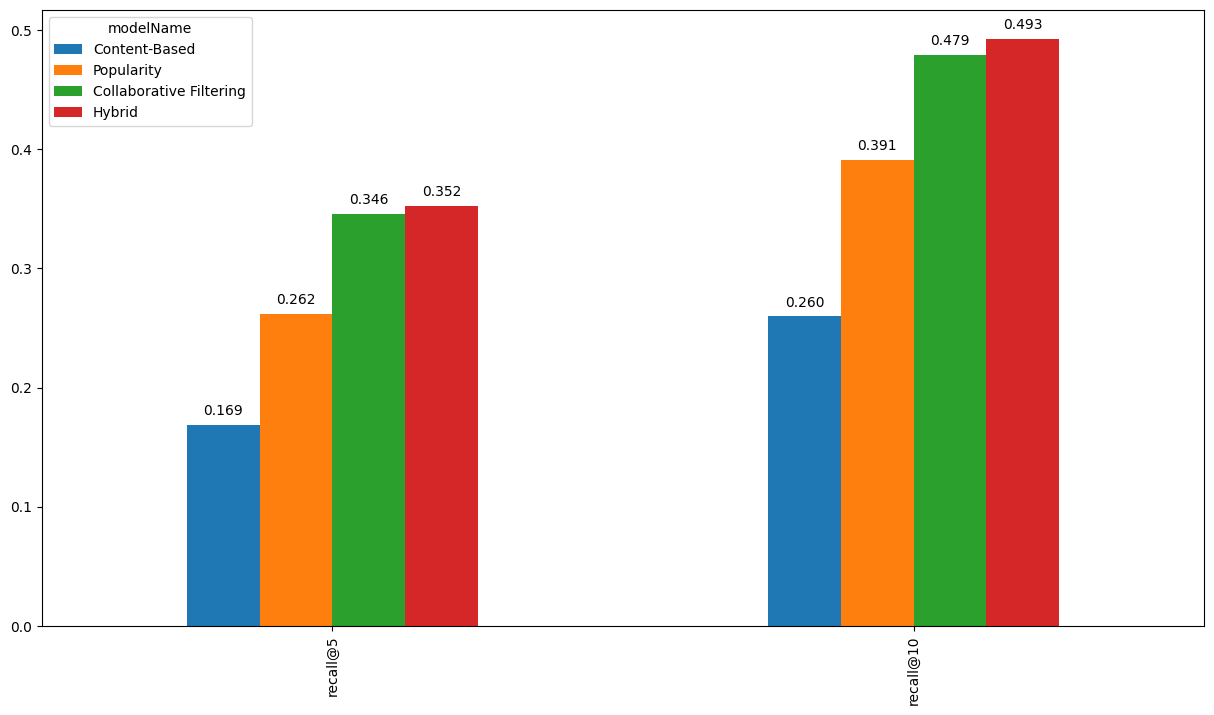

In [ ]:
%matplotlib inline
ax = global_metrics_df.transpose().plot(kind='bar', figsize=(15,8))
for p in ax.patches:
    ax.annotate("%.3f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Testing

In [ ]:
def inspect_interactions(person_id, test_set=True):
    if test_set:
        interactions_df = interactions_test_indexed_df
    else:
        interactions_df = interactions_train_indexed_df
    return interactions_df.loc[person_id].merge(articles_df, how = 'left',
                                                      left_on = 'contentId',
                                                      right_on = 'contentId') \
                          .sort_values('eventStrength', ascending = False)[['eventStrength',
                                                                          'contentId',
                                                                          'title', 'url', 'lang']]

In [ ]:
inspect_interactions(-1479311724257856983, test_set=False).head(20)

,eventStrength,contentId,title,url,lang
103,4.285402,7342707578347443200,"At eBay, Machine Learning is Driving Innovativ...",https://www.ebayinc.com/stories/news/at-ebay-m...,en
114,4.129283,621816023396605568,AI Is Here to Help You Write Emails People Wil...,http://www.wired.com/2016/08/boomerang-using-a...,en
83,4.044394,-4460374799273063936,"Deep Learning for Chatbots, Part 1 - Introduction",http://www.wildml.com/2016/04/deep-learning-fo...,en
78,3.954196,-7959318068735027200,Auto-scaling scikit-learn with Spark,https://databricks.com/blog/2016/02/08/auto-sc...,en
98,3.700440,-398780385766545280,10 Stats About Artificial Intelligence That Wi...,http://www.fool.com/investing/2016/06/19/10-st...,en
1,3.643856,-6467708104873170944,5 reasons your employees aren't sharing their ...,http://justcuriousblog.com/2016/04/5-reasons-y...,en
24,3.523562,-4944551138301474816,Algorithms and architecture for job recommenda...,https://www.oreilly.com/ideas/algorithms-and-a...,en
64,3.459432,-532999578436827200,IBM Seeks to Simplify Graph with New Titan Ser...,https://www.datanami.com/2016/07/27/ibm-seeks-...,en
79,3.459432,-8377626164558008320,Bad Writing Is Destroying Your Company's Produ...,https://hbr.org/2016/09/bad-writing-is-destroy...,en
6,3.459432,-5658245291907121152,Machine Learning and the VP Debate,https://medium.com/@srobtweets/machine-learnin...,en


In [ ]:
hybrid_recommender_model.recommend_items(-1479311724257856983, topn=20, verbose=True)

,recStrengthHybrid,contentId,title,url,lang
0,37.277336,-6467708104873170944,5 reasons your employees aren't sharing their ...,http://justcuriousblog.com/2016/04/5-reasons-y...,en
1,33.899149,-6727357771678896128,This Super Accurate Portrait Selection Tech Us...,http://petapixel.com/2016/06/29/super-accurate...,en
2,33.666249,-7126520323752764416,"How Google is Remaking Itself as a ""Machine Le...",https://backchannel.com/how-google-is-remaking...,en
3,32.807595,4118743389464105472,Why Google App Engine rocks: A Google engineer...,https://cloudplatform.googleblog.com/2016/04/w...,en
4,32.065037,-5658245291907121152,Machine Learning and the VP Debate,https://medium.com/@srobtweets/machine-learnin...,en
5,32.008297,4241385837165861376,Understanding the Twitter topic Tracker,https://unionmetrics.zendesk.com/hc/en-us/arti...,en
6,31.937676,3320201327008235008,How Mark Zuckerberg Led Facebook's War to Crus...,http://www.vanityfair.com/news/2016/06/how-mar...,en
7,31.766499,-8085935119790092288,Graph Capabilities with the Elastic Stack,https://www.elastic.co/webinars/sneak-peek-of-...,en
8,31.583371,1005751836898964352,Seria Stranger Things uma obra de arte do algo...,https://www.linkedin.com/pulse/seria-stranger-...,pt
9,31.250191,5092635400707338240,Power to the People: How One Unknown Group of ...,https://medium.com/@atduskgreg/power-to-the-pe...,en
